# Image Processing Filters

Filters are mathematical operations that produce a new image out of one or more images. Pixel values between input and output images may differ.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data
from skimage import filters
from skimage import morphology
from scipy.ndimage import convolve, gaussian_laplace
import stackview

To demonstrate what specific filters do, we start with a very simple image. It contains a lot of zeros and a single pixel with value `1` in the middle.

In [5]:
image1 = np.zeros((5, 5))
image1[2, 2] = 1
image1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

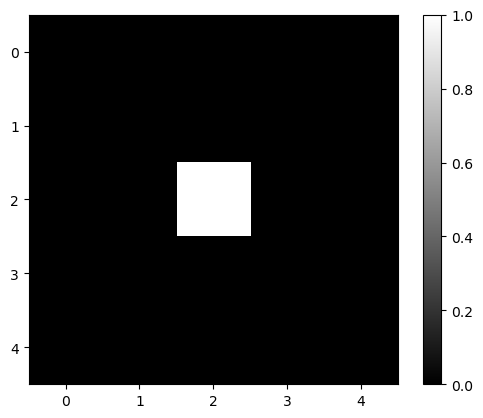

In [6]:
plt.imshow(image1, cmap='gray')
plt.colorbar()

## Gaussian kernel
To apply a _Gaussian blur_ to an image, we convolve it using a Gaussian kernel. The function [`gaussian` in scikit-image](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian) can do this for us.

In [7]:
blurred = filters.gaussian(image1, sigma=1)
blurred

array([[0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.02153941, 0.09653293, 0.15915589, 0.09653293, 0.02153941],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504]])

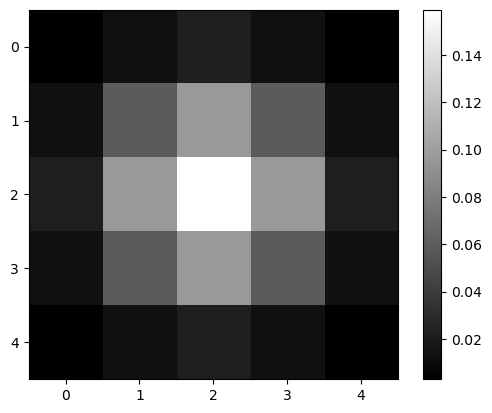

In [8]:
plt.imshow(blurred, cmap='gray')
plt.colorbar()

## Laplacian
Whenever you wonder what a filter might be doing, just create a simple test image and apply the filter to it.

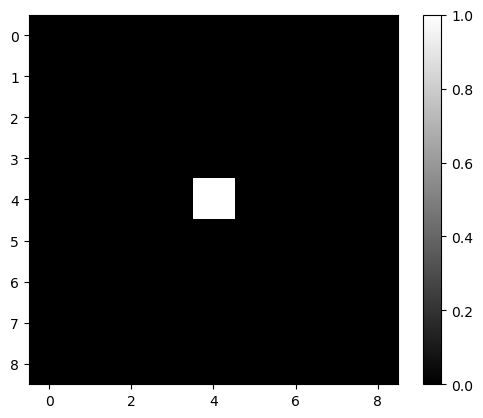

In [9]:
image2 = np.zeros((9, 9))
image2[4, 4] = 1

plt.imshow(image2, cmap='gray')
plt.colorbar()

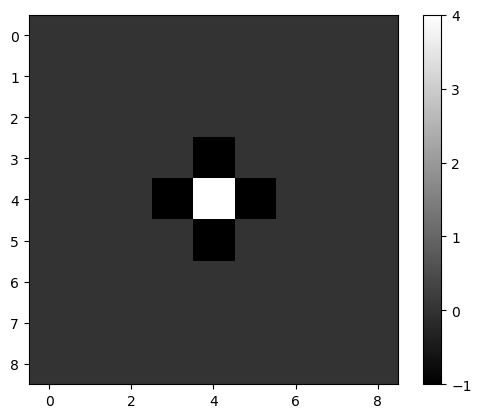

In [10]:
mexican_hat = filters.laplace(image2)

plt.imshow(mexican_hat, cmap='gray')
plt.colorbar()

## Laplacian of Gaussian

We can also combine filters, e.g. using functions. If we apply a Gaussian filter to an image and a Laplacian afterwards, we have a filter doing the _Laplacian of Gaussian_ (LoG) per definition.

In [11]:
def laplacian_of_gaussian(image, sigma):
    """
    Applies a Gaussian kernel to an image and the Laplacian afterwards.
    """
    
    # Blur the image using a Gaussian kernel
    intermediate_result = filters.gaussian(image, sigma)
    
    # Apply the mexican hat filter (Laplacian)
    result = filters.laplace(intermediate_result)
    
    return result

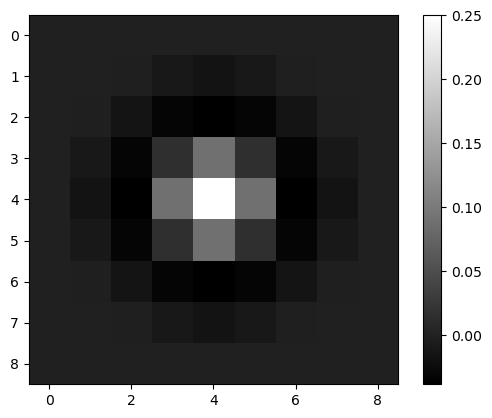

In [12]:
log_image1 = laplacian_of_gaussian(image2, sigma=1)

plt.imshow(log_image1, cmap='gray')
plt.colorbar()

## Interactive filter parameter tuning
To understand better what filters are doing, it shall be recommended to apply them interactively. The following code will not render on github.com. You need to execute the notebook locally use this interactive user-interface.

In [13]:
image3 = imread('data/mitosis_mod.tif').astype(float)

In [14]:
stackview.interact(laplacian_of_gaussian, image3, zoom_factor=4)

## More filter examples
We demonstrate some more typical filters using this nuclei example image.

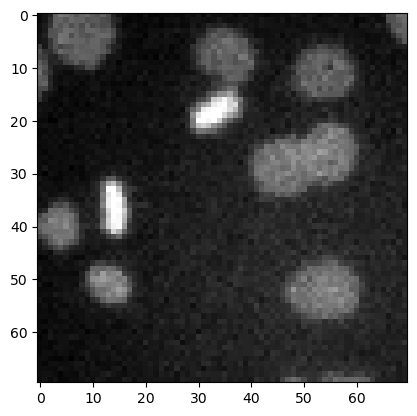

In [15]:
plt.imshow(image3, cmap='gray')

## Denoising
Common filters for denoising images are the mean filter, the median filter and the Gaussian filter.

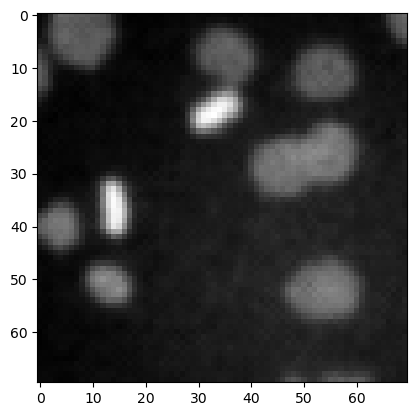

In [16]:
denoised_mean = filters.rank.mean(image3.astype(np.uint8), morphology.disk(1))

plt.imshow(denoised_mean, cmap='gray')

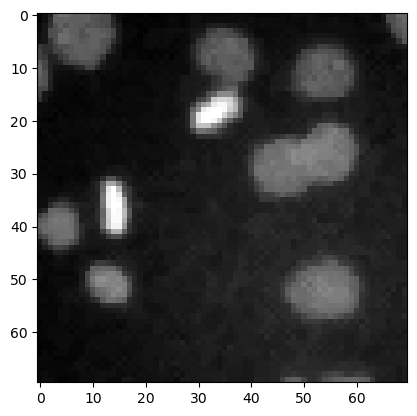

In [17]:
denoised_median = filters.median(image3, morphology.disk(1))

plt.imshow(denoised_median, cmap='gray')

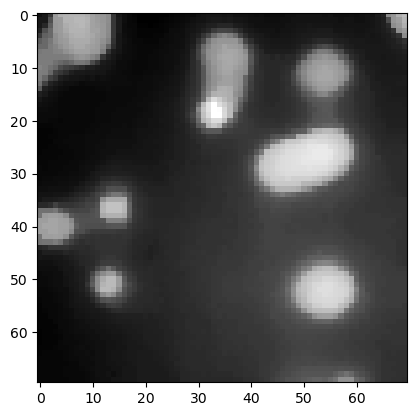

In [18]:
denoised_median2 = filters.median(image3, morphology.disk(5))

plt.imshow(denoised_median2, cmap='gray')

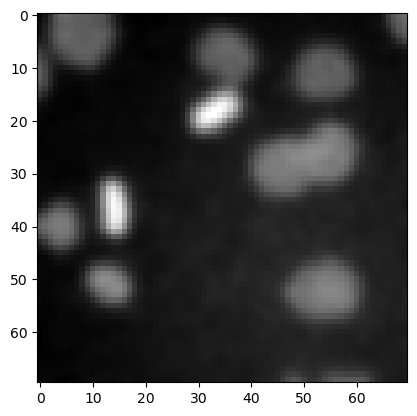

In [19]:
denoised_gaussian = filters.gaussian(image3, sigma=1)

plt.imshow(denoised_gaussian, cmap='gray')

We can also show these images side-by-side using matplotlib.

Text(0.5, 1.0, 'Gaussian filter')

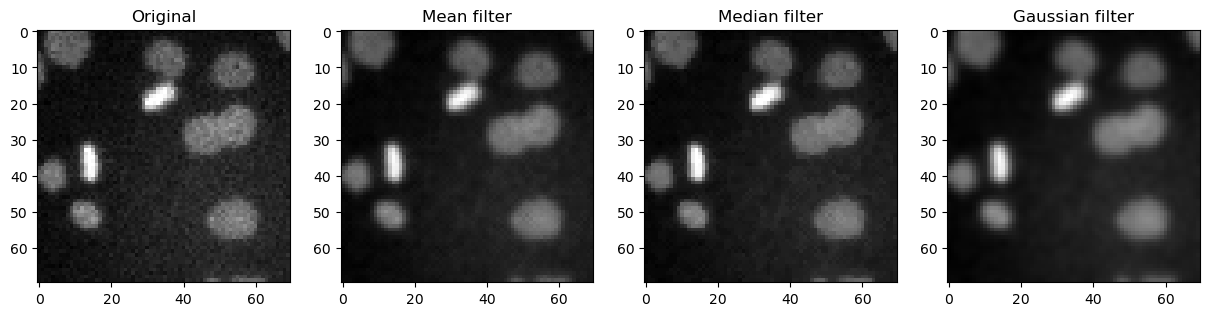

In [24]:
fig, axes = plt.subplots(1,4, figsize=(15,15))

axes[0].imshow(image3, cmap='gray')
axes[0].set_title("Original")
axes[1].imshow(denoised_mean, cmap='gray')
axes[1].set_title("Mean filter")
axes[2].imshow(denoised_median, cmap='gray')
axes[2].set_title("Median filter")
axes[3].imshow(denoised_gaussian, cmap='gray')
axes[3].set_title("Gaussian filter")

### Top-hat filtering / background removal

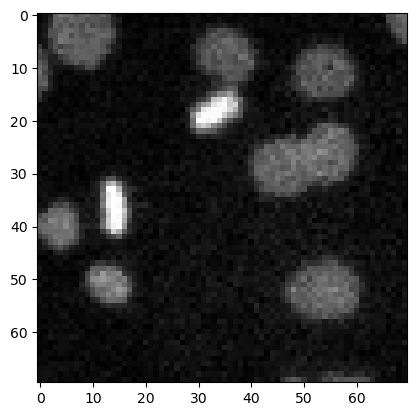

In [25]:
top_hat = morphology.white_tophat(image3, morphology.disk(15))

plt.imshow(top_hat, cmap='gray')

### Edge detection

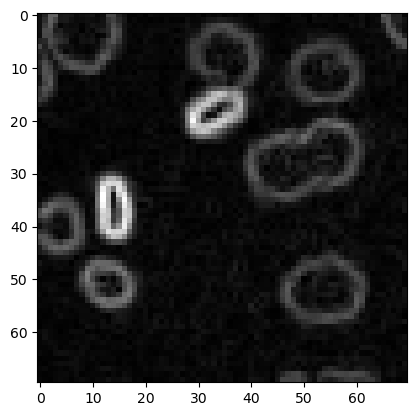

In [26]:
sobel = filters.sobel(image3)

plt.imshow(sobel, cmap='gray')

## Custom kernel

When applying linear filters such as Gaussian and Laplacian, we technically [convolve](https://en.wikipedia.org/wiki/Convolution) the image. We can also convolve it using a custom kernel.

In [27]:
kernel1 = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]

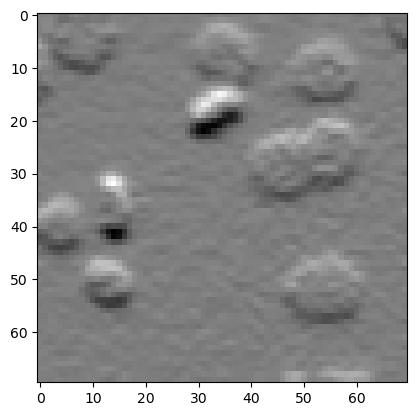

In [22]:
output1 = convolve(image3, kernel1)

plt.imshow(output1, cmap='gray')

# Exercise 1

The above filter highlights horizontal edges in the image. Write code that highlights vertical edges. 

Hint: [read more about the Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator).

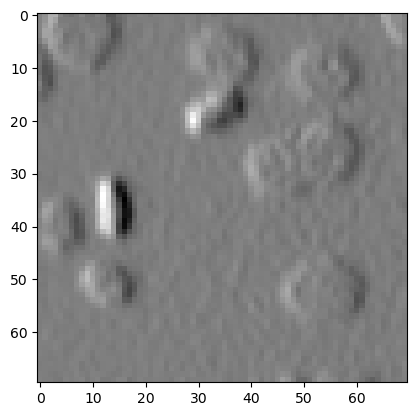

In [24]:
kernel2 = [[1, 0, -1],
           [2, 0, -2],
           [1, 0, -1]]

output2 = convolve(image3, kernel2)

plt.imshow(output2, cmap='gray')

# Exercise 2

Write a function that computes the [Difference of Gaussian](https://en.wikipedia.org/wiki/Difference_of_Gaussians). 

In [29]:
def difference_of_gaussian(image, sigma1, sigma2):
    # sigma1 must have a narrower standard deviation (sigma) than sigma 2
    if sigma1 < sigma2:
        dog_image = image * (filters.gaussian(image, sigma=sigma1) - filters.gaussian(image, sigma=sigma2))
    # In case of incorrect input of values this just flips the sigmas
    else:
        dog_image = image * (filters.gaussian(image, sigma=sigma2) - filters.gaussian(image, sigma=sigma1))
    
    return dog_image

Use a simple function call to try out the function.

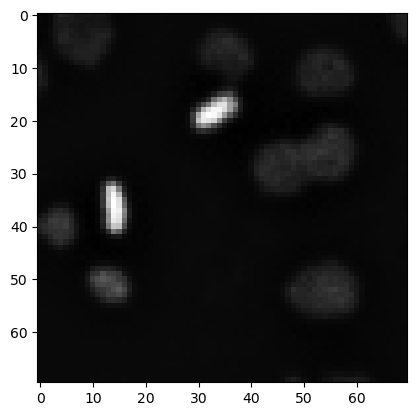

In [30]:
dog_image = difference_of_gaussian(image3, 1, 5)

plt.imshow(dog_image, cmap='gray')

Use the [stackview](https://github.com/haesleinhuepf/stackview) library to play with it interactively.

In [31]:
stackview.interact(difference_of_gaussian, image3)